<a href="https://colab.research.google.com/github/Methelesh-Suresh/Machine-Learning/blob/main/Bike_Sharing_Demand_Prediction(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Import Dependancy**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import csv file and put the data in data variable name
df = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv', encoding = 'unicode_escape')

In [4]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [6]:
df.shape

(8760, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

## **Exploratory Data Analysis (EDA)**

In [9]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#### **Relationship b/w Seasons and Rented Bike Count**

In [10]:
Seasons_and_Rented_Bike_Count = df.groupby('Seasons')['Rented Bike Count'].mean()
Seasons_and_Rented_Bike_Count

Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64

Text(0.5, 1.0, 'Relationship b/w Seasons and Rented Bike Count')

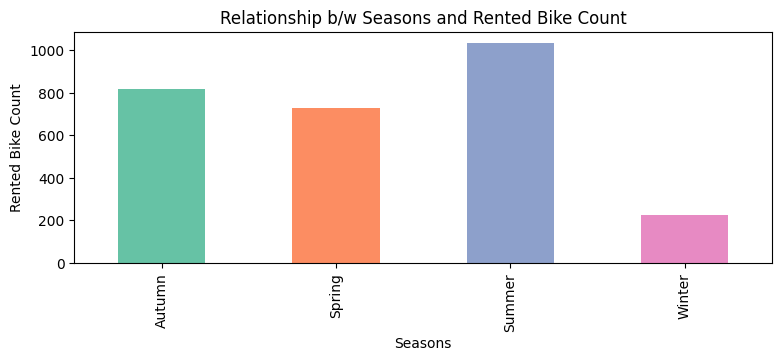

In [11]:
plt.figure(figsize=(9,3))
Seasons_and_Rented_Bike_Count.plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Seasons and Rented Bike Count')

<Axes: ylabel='Rented Bike Count'>

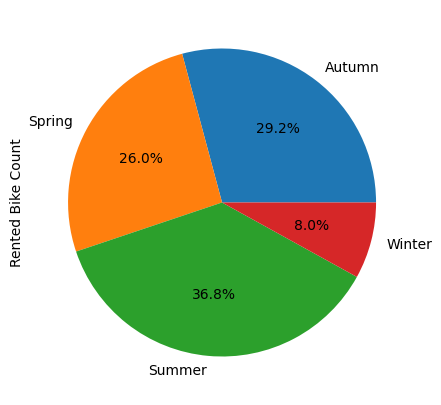

In [12]:
plt.figure(figsize=(5, 5))
Seasons_and_Rented_Bike_Count.plot(kind = 'pie',autopct='%1.1f%%',color = sns.color_palette('Set2'))

In [13]:
Seasons_and_Rented_Bike_Count = df.groupby('Seasons')['Rented Bike Count'].sum()
Seasons_and_Rented_Bike_Count

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

Text(0.5, 1.0, 'Relationship b/w Seasons and total Rented Bike Count')

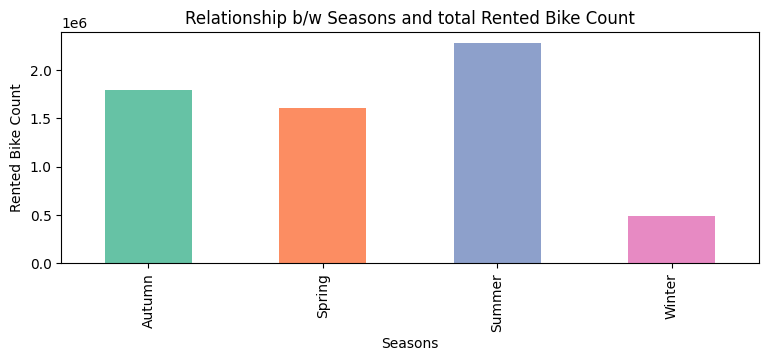

In [14]:
plt.figure(figsize=(9,3))
Seasons_and_Rented_Bike_Count.plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Seasons and total Rented Bike Count')

#### **Relationship b/w Holiday Seasons and Rented Bike Count**

In [15]:
Holiday_Seasons_and_Rented_Bike_Count = df.groupby('Holiday')['Rented Bike Count'].sum()
Holiday_Seasons_and_Rented_Bike_Count

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

<Axes: ylabel='Rented Bike Count'>

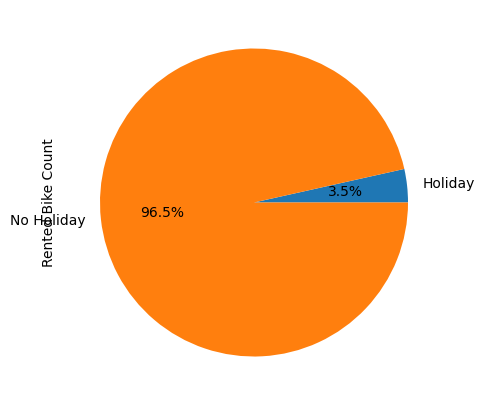

In [16]:
plt.figure(figsize=(5, 5))
Holiday_Seasons_and_Rented_Bike_Count.plot(kind = 'pie',autopct='%1.1f%%',color = sns.color_palette('Set2'))

In [17]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [18]:
Holiday_Seasons_and_Rented_Bike_Count = df.groupby(['Holiday','Seasons'])['Rented Bike Count'].sum().unstack()
Holiday_Seasons_and_Rented_Bike_Count

Seasons      Autumn   Spring   Summer  Winter
Holiday                                      
Holiday       91018    45742    49063   30072
No Holiday  1698984  1566167  2234171  457097

Text(0.5, 1.0, 'Relationship b/w Holiday and Seasons')

<Figure size 800x600 with 0 Axes>

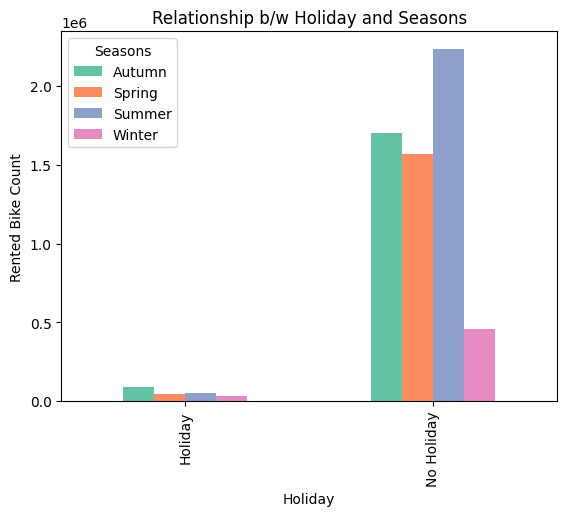

In [19]:
plt.figure(figsize=(8, 6))
Holiday_Seasons_and_Rented_Bike_Count.plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Holiday and Seasons')

In [20]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#### **Relationship b/w seasons humidity and bike count**

Text(0, 0.5, 'Rented Bike Count')

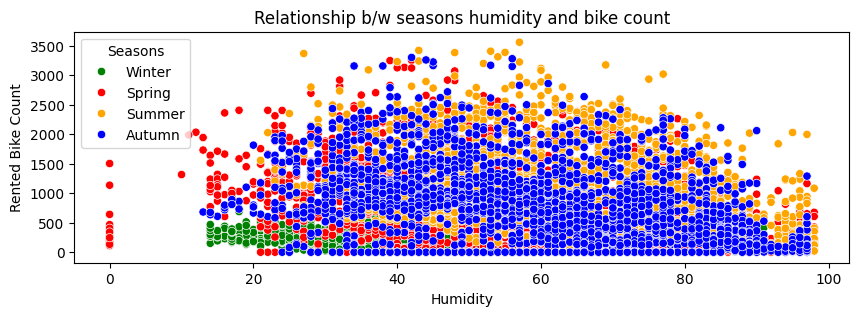

In [21]:
plt.figure(figsize=(10,3))
sns.scatterplot(data = df, x = df['Humidity(%)'], y = df['Rented Bike Count'], hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.title('Relationship b/w seasons humidity and bike count')
plt.xlabel('Humidity')
plt.ylabel('Rented Bike Count')

#### **Temperature, Rented Bike Count for diffrent Seasons**

Text(0, 0.5, 'Rented Bike Count')

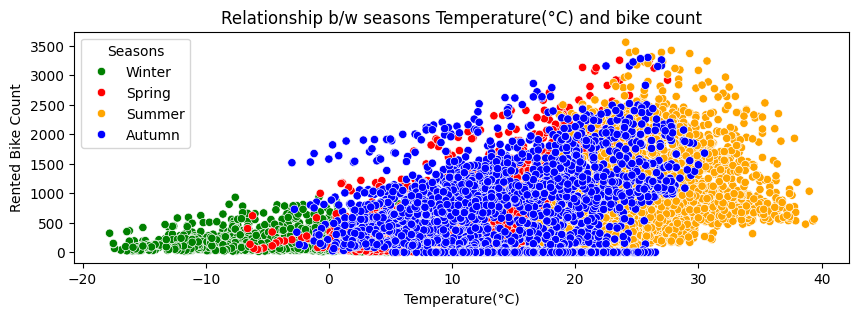

In [22]:
plt.figure(figsize=(10,3))
sns.scatterplot(data = df, x = df['Temperature(°C)'], y = df['Rented Bike Count'], hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.title('Relationship b/w seasons Temperature(°C) and bike count')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')

#### **Wind speed (m/s), Rented Bike Count for diffrent Seasons**

Text(0, 0.5, 'Rented Bike Count')

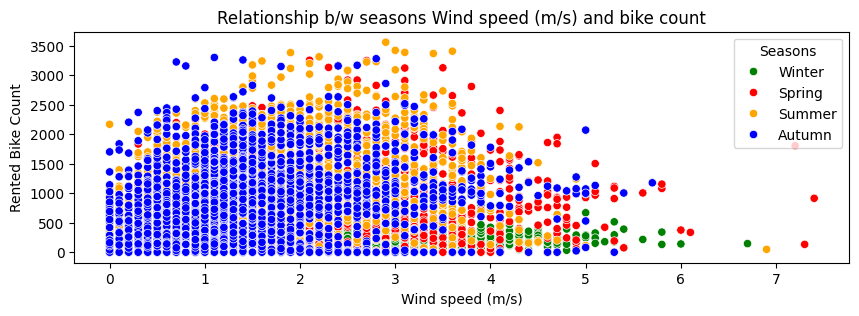

In [23]:
plt.figure(figsize=(10,3))
sns.scatterplot(data = df, x = df['Wind speed (m/s)'], y = df['Rented Bike Count'], hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.title('Relationship b/w seasons Wind speed (m/s) and bike count')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')

#### **Visibility (10m), Rented Bike Count for diffrent Seasons**

Text(0, 0.5, 'Rented Bike Count')

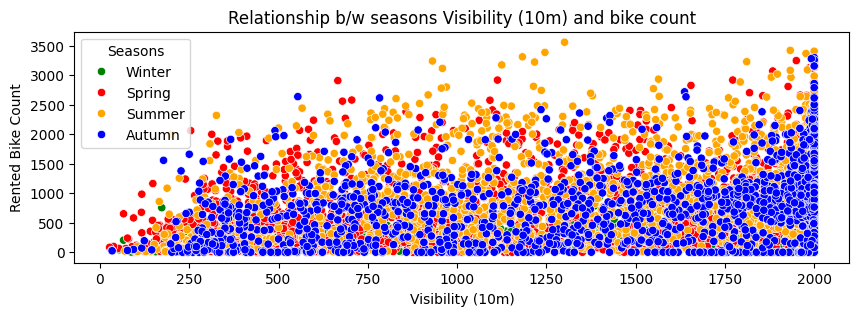

In [24]:
plt.figure(figsize=(10,3))
sns.scatterplot(data = df, x = df['Visibility (10m)'], y = df['Rented Bike Count'], hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.title('Relationship b/w seasons Visibility (10m) and bike count')
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')

#### **Solar Radiation (MJ/m2), Rented Bike Count for diffrent Seasons**

Text(0, 0.5, 'Rented Bike Count')

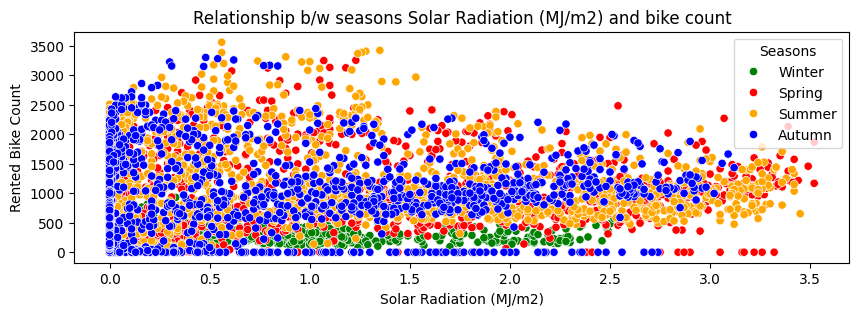

In [25]:
plt.figure(figsize=(10,3))
sns.scatterplot(data = df, x = df['Solar Radiation (MJ/m2)'], y = df['Rented Bike Count'], hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.title('Relationship b/w seasons Solar Radiation (MJ/m2) and bike count')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented Bike Count')

#### **Rainfall(mm), Rented Bike Count for diffrent Seasons**

Text(0, 0.5, 'Rented Bike Count')

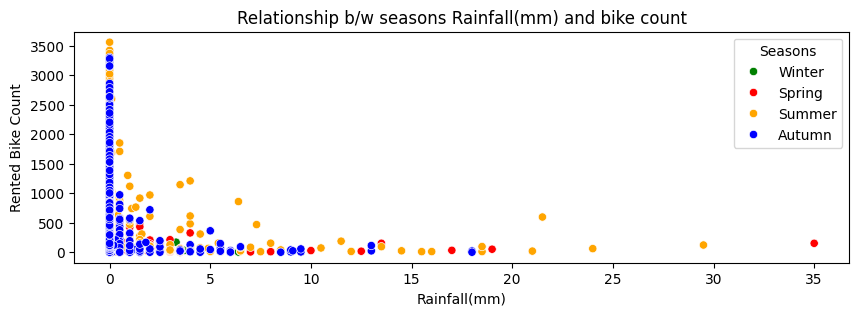

In [26]:
plt.figure(figsize=(10,3))
sns.scatterplot(data = df, x = df['Rainfall(mm)'], y = df['Rented Bike Count'], hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.title('Relationship b/w seasons Rainfall(mm) and bike count')
plt.xlabel('Rainfall(mm)')
plt.ylabel('Rented Bike Count')

#### **Snowfall, Rented Bike Count for diffrent Seasons**

Text(0, 0.5, 'Rented Bike Count')

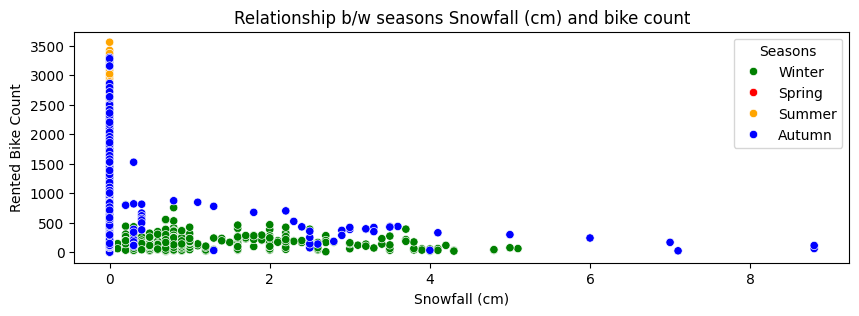

In [27]:
plt.figure(figsize=(10,3))
sns.scatterplot(data = df, x = df['Snowfall (cm)'], y = df['Rented Bike Count'], hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.title('Relationship b/w seasons Snowfall (cm) and bike count')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented Bike Count')

In [28]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#### **Hour, Rented Bike Count for diffrent Seasons**

In [29]:
bike_and_Hour = df.groupby('Hour')['Rented Bike Count'].sum()
bike_and_Hour

Hour
0     197633
1     155557
2     110095
3      74216
4      48396
5      50765
6     104961
7     221192
8     370731
9     235784
10    192655
11    219311
12    255296
13    267635
14    276971
15    302653
16    339677
17    415556
18    548568
19    436229
20    390172
21    376479
22    336821
23    244961
Name: Rented Bike Count, dtype: int64

Text(0, 0.5, 'Rented Bike Count')

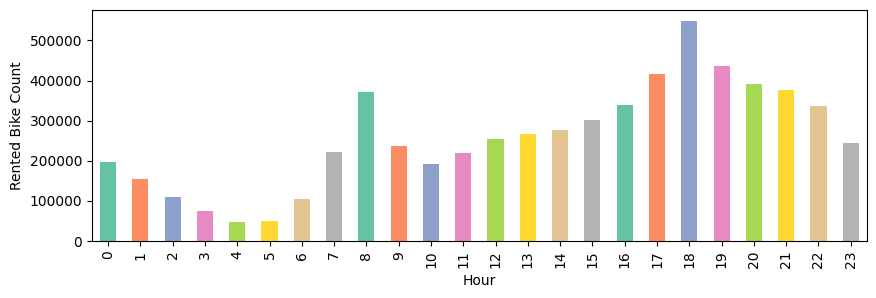

In [30]:
plt.figure(figsize=(10,3))
bike_and_Hour.plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')

#### **month, Rented Bike Count for diffrent Seasons**

In [31]:
df['Date'] = pd.to_datetime(df['Date'],format= '%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [32]:
df['month'] = df['Date'].dt.month
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  month  
0             Yes     12  
1             Yes     12  
2             Yes     12  
3             Yes     12  
4             Yes     12

Text(0.5, 1.0, 'Relationship b/w month and bike count')

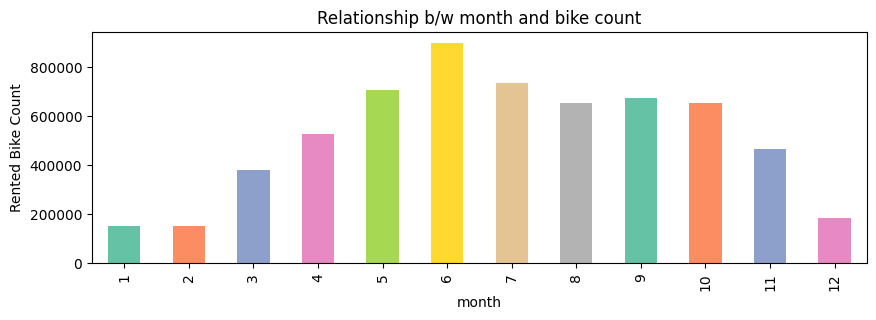

In [33]:
month_count = df.groupby('month')['Rented Bike Count'].sum()
plt.figure(figsize=(10,3))
month_count.plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.xlabel('month')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w month and bike count')

#### **Functioning Day, Rented Bike Count**

In [34]:
Functioning_Day = df.groupby('Functioning Day')['Rented Bike Count'].sum()
Functioning_Day

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

Text(0.5, 1.0, 'Relationship b/w Functioning Day and bike count')

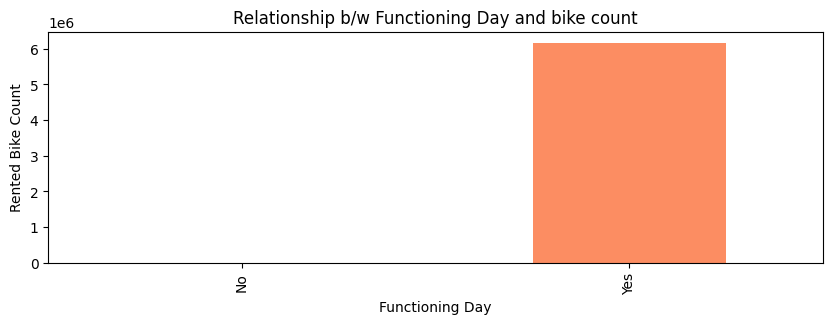

In [35]:
plt.figure(figsize=(10,3))
Functioning_Day.plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.xlabel('Functioning Day')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Functioning Day and bike count')

## **Feature Engineering**

In [36]:
num_features = df.describe().columns
num_features

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month'],
      dtype='object')

### **Histogram plot**

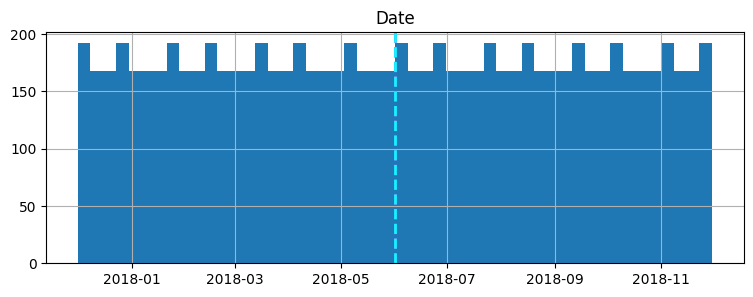

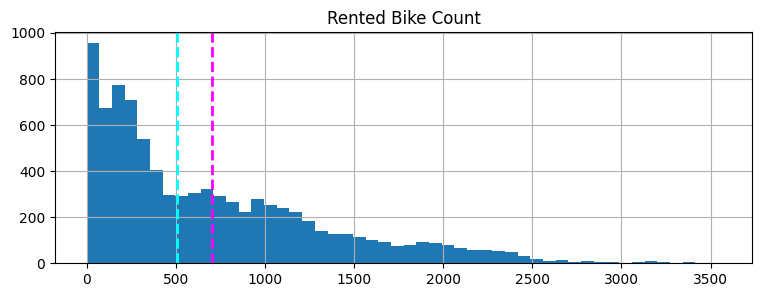

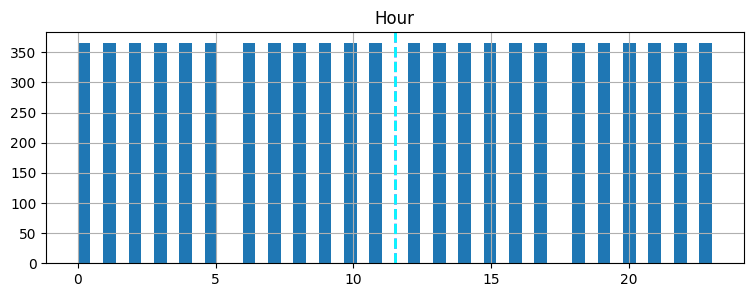

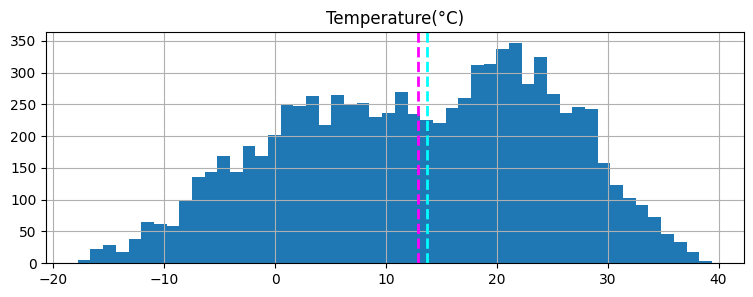

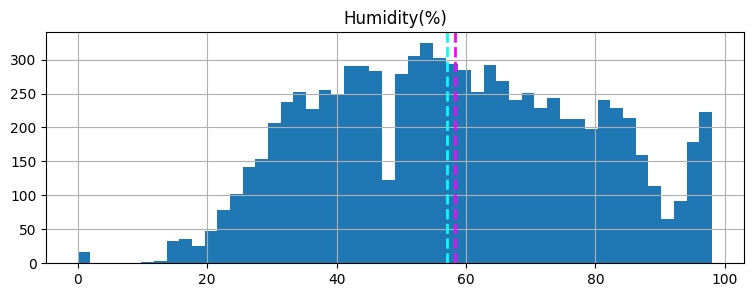

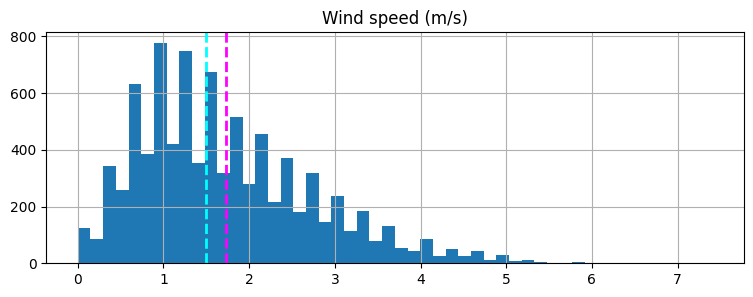

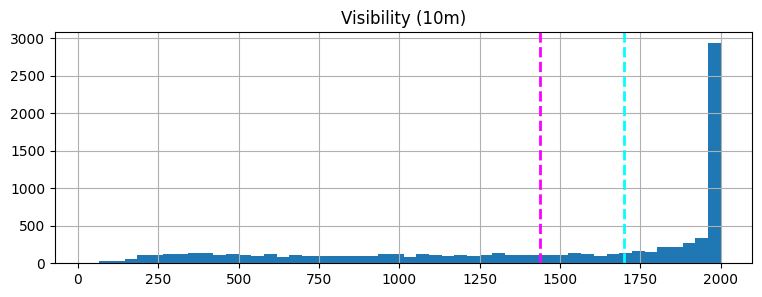

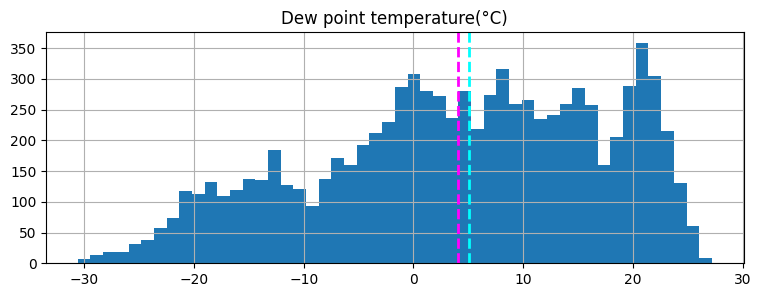

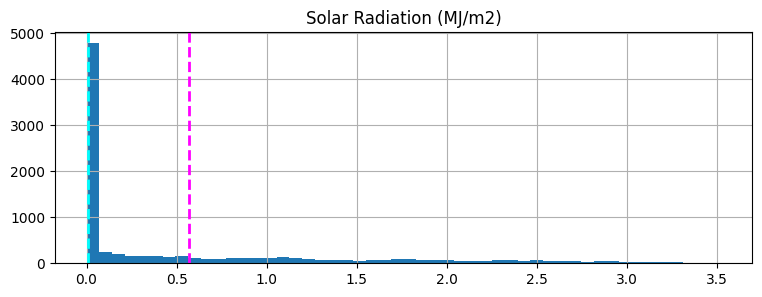

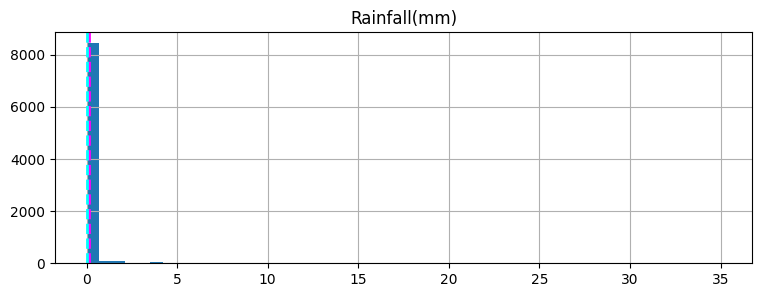

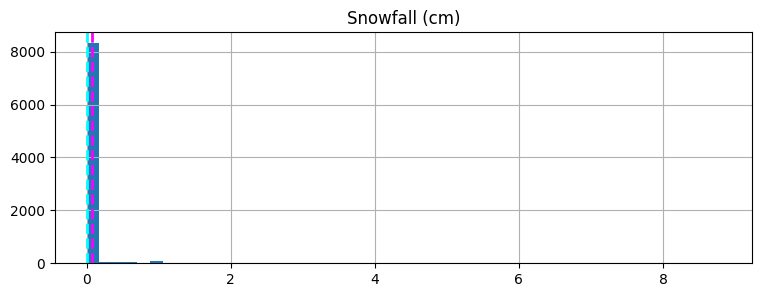

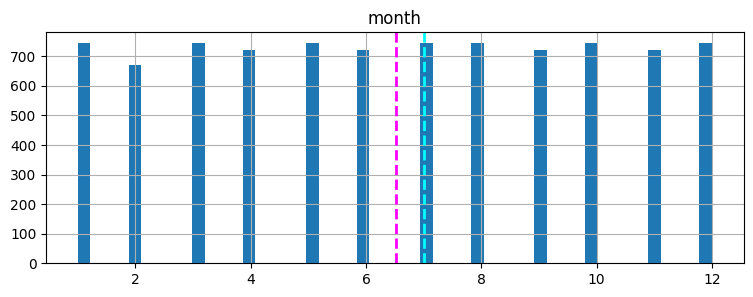

In [37]:
#plot a bar plot for each numerical feature count

for col in num_features:
  fig = plt.figure(figsize=(9,3))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins = 50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show()

### **Correlation & scatter  plot 'Rented Bike Count'**

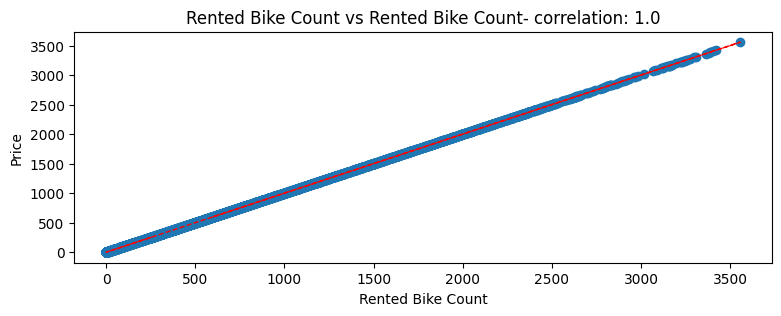

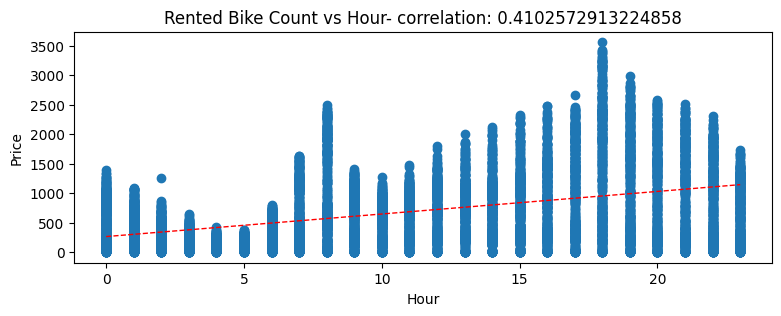

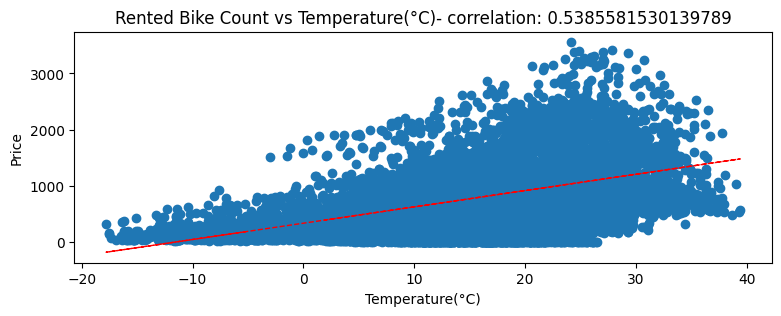

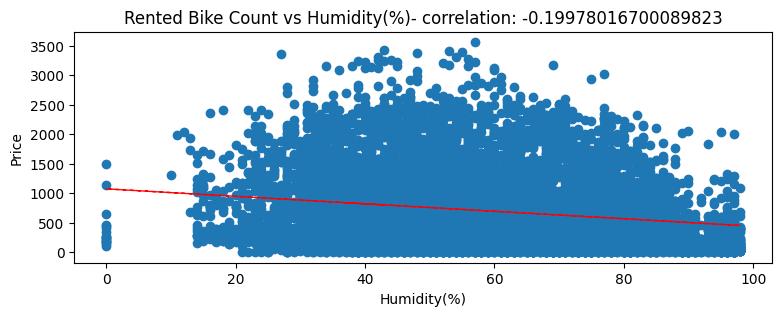

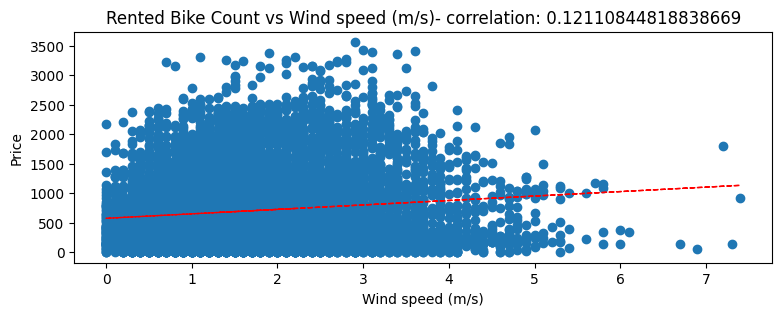

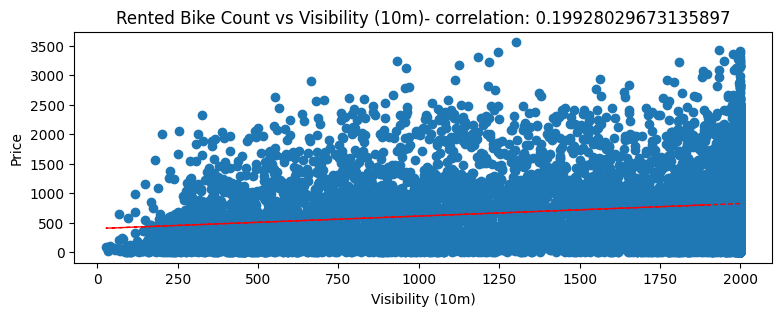

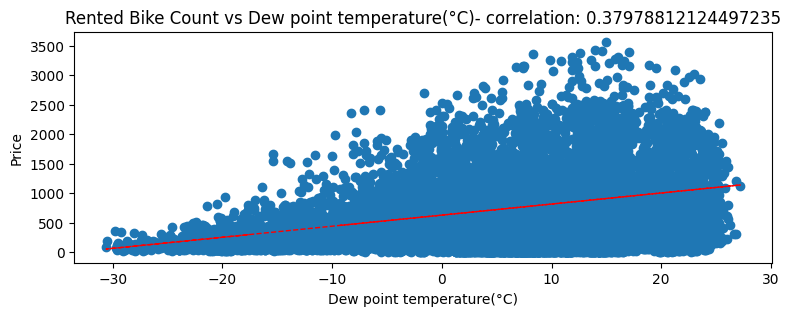

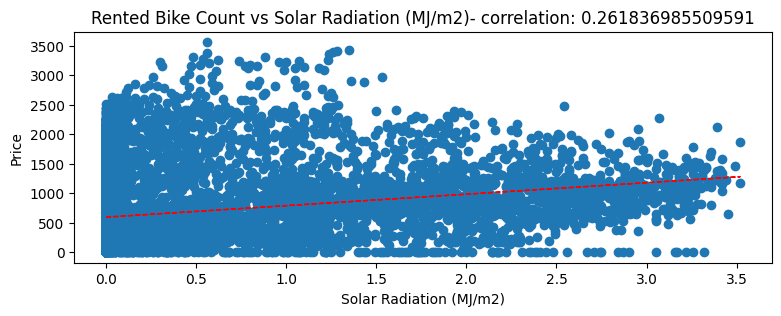

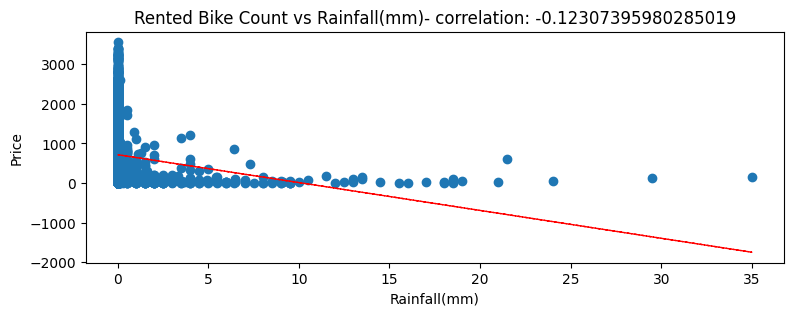

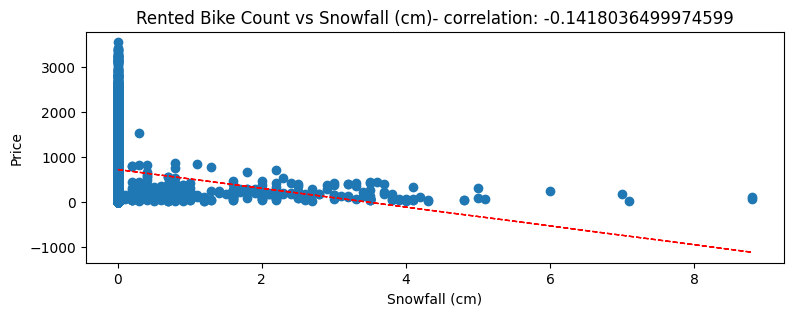

In [38]:
# Correlation & scatter plot 'Rented Bike Count'
for col in num_features[1:-1]:
  fig = plt.figure(figsize=(9,3))
  ax = fig.gca()
  feature =(df[col])
  label = df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Price')
  ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)


plt.show()

### **Feature incoding And creation**

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [40]:
df['day_name'] = df['Date'].dt.day_name()
df['month_name'] = df['Date'].dt.month_name()
df['year_name'] = df['Date'].map(lambda x: x.year).astype("object")

In [41]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  month day_name month_name year_name  
0             Yes     12   Friday   December      2017  
1             Yes     12   Friday   December      2017  
2             Yes     12   Friday   December      2017  
3             Yes     12   Friday   December      2017  
4             Yes     12   Friday   December      2017

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [43]:
df.drop(columns = ['Date','month'],inplace = True)

In [44]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day_name', 'month_name', 'year_name'],
      dtype='object')

In [45]:
df['week'] = df['day_name'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [46]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day day_name  \
0           0.0            0.0  Winter  No Holiday             Yes   Friday   
1           0.0            0.0  Winter  No Holiday             Yes   Friday   
2           0.0            0.0  Winter  No Holiday             Yes   Friday   
3           0.0            0.0  Winter  No Holiday             Yes   Friday   
4           0.0            0.0  Winter  No Holiday             Yes   Friday   

  month_name year_name      week  
0   December      2017  Weekdays  
1   December      2017  Weekdays  
2   December      2017  Weekdays  
3   December      2017  Weekdays  
4   December      2017  Weekdays

Text(0.5, 1.0, 'Rented Bike Count during weekday and weekend with respect of Hour')

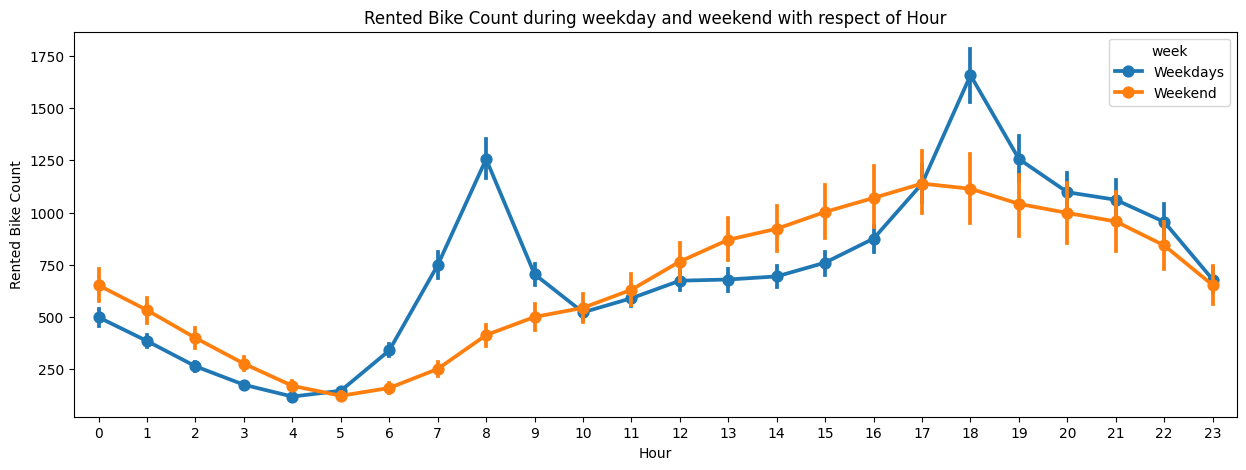

In [47]:
plt.figure(figsize=(15,5))
sns.pointplot(x = 'Hour', y = 'Rented Bike Count', hue = 'week', data = df)
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")

In [48]:
df.drop(columns = ['day_name'],inplace = True)

**Lets do some feature engineering on Hour column**

In [49]:
def hour(h):
  if h >= 17 and h <= 22:
    return 'Evening'
  elif h >= 7 and h <= 10:
    return 'Morning'
  elif h >= 11 and h <= 16:
    return 'Noon'
  else :
    return 'Night'

In [50]:
df['Hour'] = df['Hour'].apply(hour)

In [51]:
df['Hour'].value_counts()

Hour
Night      2920
Noon       2190
Evening    2190
Morning    1460
Name: count, dtype: int64

### **Features Selections**

#### **Correlation**

In [52]:
int_columns_df = df.select_dtypes(include=['int', 'float'])

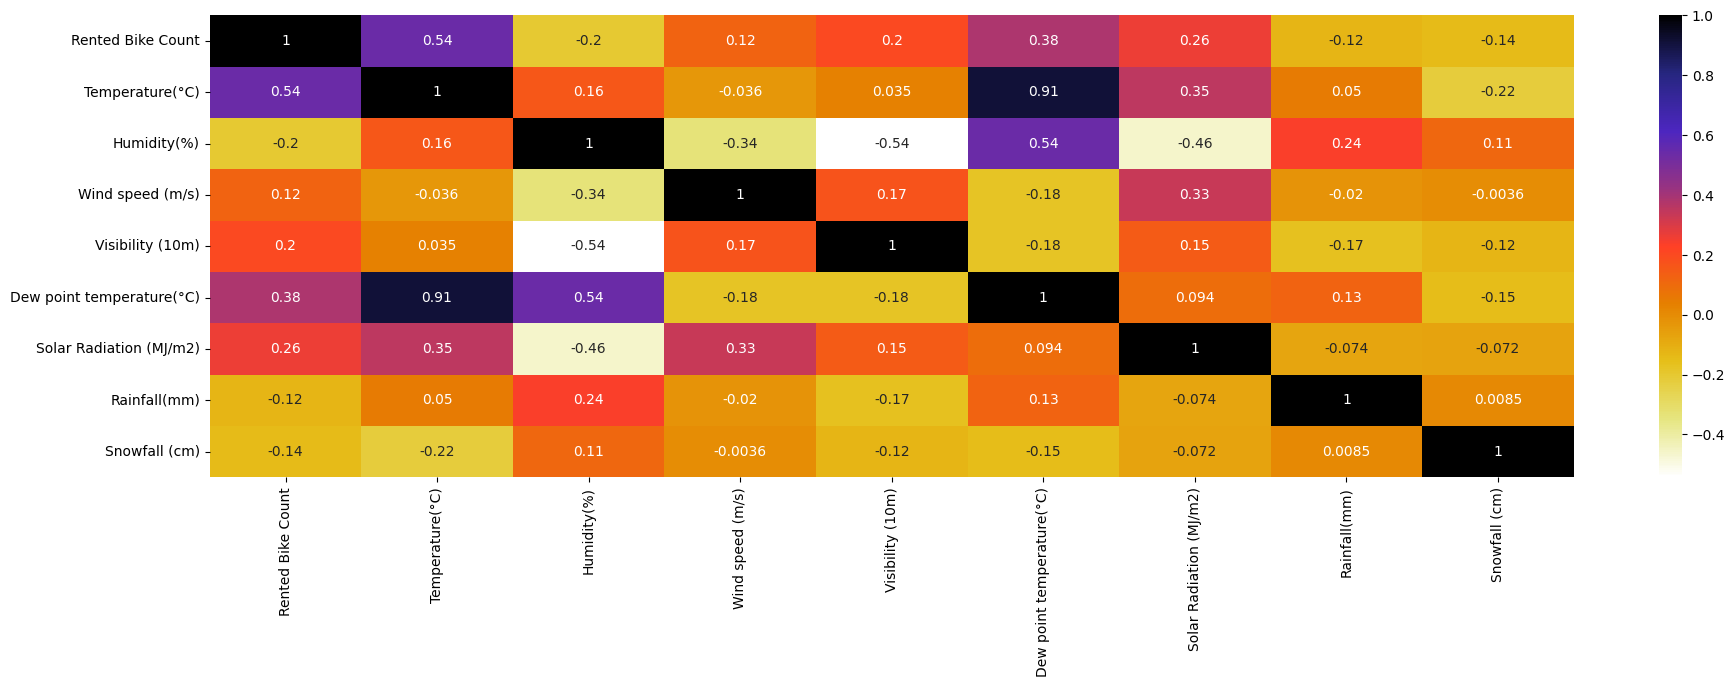

In [53]:
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(22,6))
cor = int_columns_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [54]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month_name', 'year_name', 'week'],
      dtype='object')

In [55]:
df.drop(columns = ['Dew point temperature(°C)'],inplace = True)

In [56]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'month_name', 'year_name', 'week'],
      dtype='object')

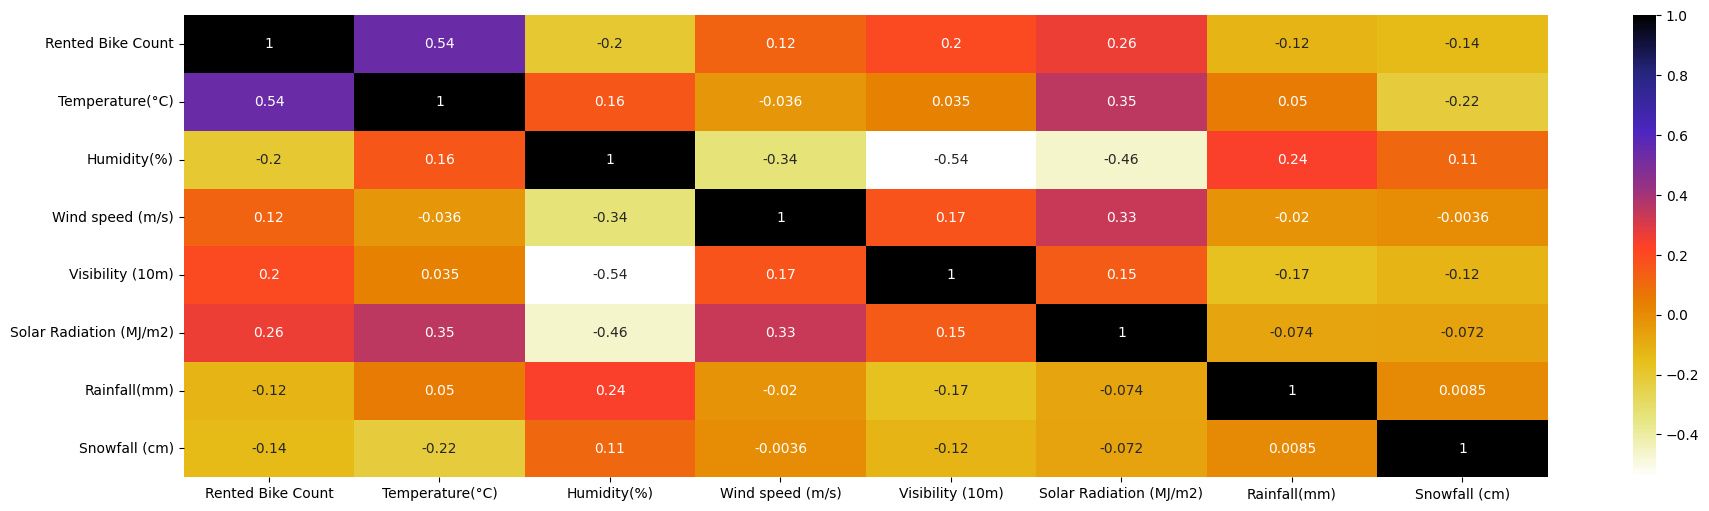

In [57]:
int_columns_df = df.select_dtypes(include=['int', 'float'])
plt.figure(figsize=(22,6))
cor = int_columns_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## **Data Pre-processing**

### **Feature Scaling**

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   object 
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  month_name               8760 non-null   object 
 13  year_name                8760 non-null   object 
 14  week                    

In [59]:
df = pd.get_dummies(df,drop_first = True,sparse=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Rented Bike Count        8760 non-null   int64              
 1   Temperature(°C)          8760 non-null   float64            
 2   Humidity(%)              8760 non-null   int64              
 3   Wind speed (m/s)         8760 non-null   float64            
 4   Visibility (10m)         8760 non-null   int64              
 5   Solar Radiation (MJ/m2)  8760 non-null   float64            
 6   Rainfall(mm)             8760 non-null   float64            
 7   Snowfall (cm)            8760 non-null   float64            
 8   Hour_Morning             1 non-null      Sparse[bool, False]
 9   Hour_Night               1 non-null      Sparse[bool, False]
 10  Hour_Noon                1 non-null      Sparse[bool, False]
 11  Seasons_Spring           1 non

<ipython-input-59-e749a4438c2e>:2: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df.info()


In [60]:
df.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Hour_Morning  Hour_Night  ...  month_name_January  month_name_July  \
0         False        True  ...               False            False   
1         False        True  ...               False            False   
2         False        True  ...               False            False   
3         False        True  ...               False            False   
4         False        True  ...               False            False   

   month_name_June  month_name_March  month_name_May  month_name_November  \
0            False             False           False                False   
1            False             False           False                False   
2            False             False           False                False   
3            False             False           False                False   
4            False             False           False                False   

   month_name_October  month_name_September  year_name_2018  week_Weekend  
0               False                 False           False         False  
1               False                 False           False         False  
2               False                 False           False         False  
3               False                 False           False         False  
4               False                 False           False         False  

[5 rows x 29 columns]

**transforming X_train and X_test**

In [61]:
x = df.drop(columns = ['Rented Bike Count'])
y = df['Rented Bike Count']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

#### **Scaling the dataset**

In [64]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
scaler = PowerTransformer()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):


## **Model Implementation**

### **Import Dependancy**

In [65]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

**Create a function for scores**

In [66]:
# Appending all models parameters to the corrosponding list

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:
      # finding the best parameters of the model if any
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass


  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    try:

      # ploting the graph of feature importance

      best = model.best_estimator_
      features = X_train.columns
      importances = best.feature_importances_
      indices = np.argsort(importances)
      plt.figure(figsize=(10,15))
      plt.title('Feature Importance')
      plt.barh(range(len(indices)), importances[indices], color='red', align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()

    except:
      pass


  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

### **Linear Regression**

Training score  = 0.667066409589775
MAE : 288.29902048980483
MSE : 140333.04501972153
RMSE : 374.6105244380108
R2 : 0.6570559436968813
Adjusted R2 :  0.652612429779025 

********************************************************************************
coefficient 
 [ 303.78165587  -69.41408551   19.34477762   35.87871171   71.86707693
 -122.2912395    13.39281221 -147.95418524 -293.99160335 -263.51594059
   -7.45707345  -15.72477804  -43.81290335   29.63699965  179.43306872
  -71.1244682    -4.00323814  -38.97581748  -26.39566873  -23.50446521
   71.53261698  -33.25058387   36.5753973    27.714439     55.11148193
   20.1654796     4.00323814  -32.5323796 ]


Intercept  =  705.7963470319634


******************** ploting the graph of Actual and predicted only with 80 observation ********************


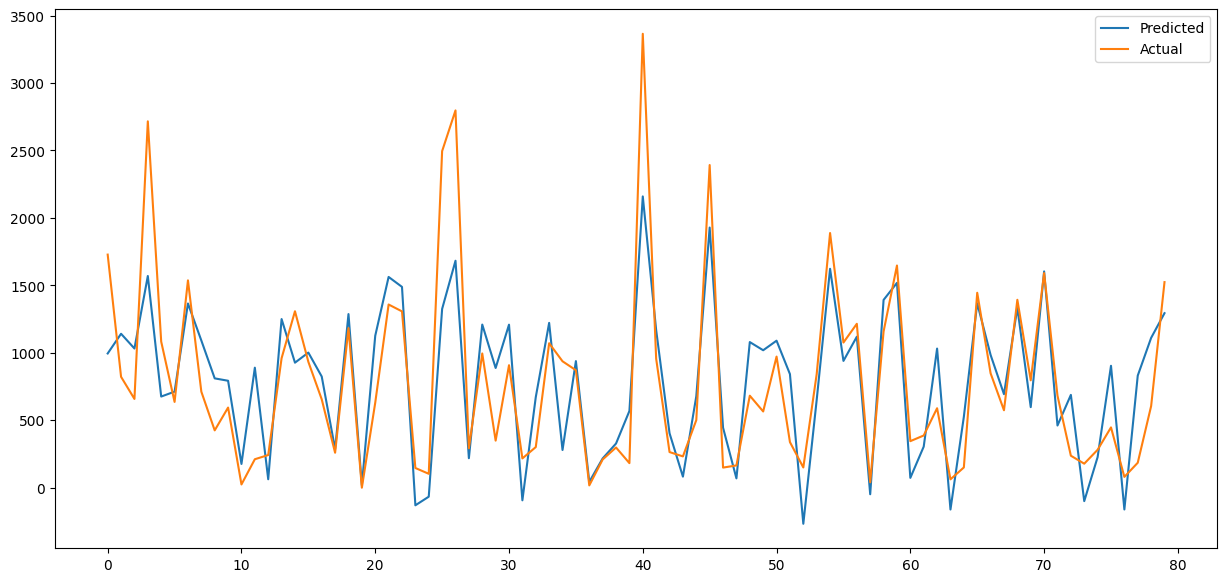

In [67]:
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

### **Lasso with hyperparameter tuning**

In [68]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.482e+08, tolerance: 2.190e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.628e+08, tolerance: 2.193e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.579e+08, tolerance: 2.191e

Training score  = 0.6670664095897749
The best parameters found out to be :{'alpha': 1e-15} 
where model best score is:  0.6638922287360846 

MAE : 288.2990204898049
MSE : 140333.04501972155
RMSE : 374.6105244380109
R2 : 0.6570559436968813
Adjusted R2 :  0.652612429779025 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


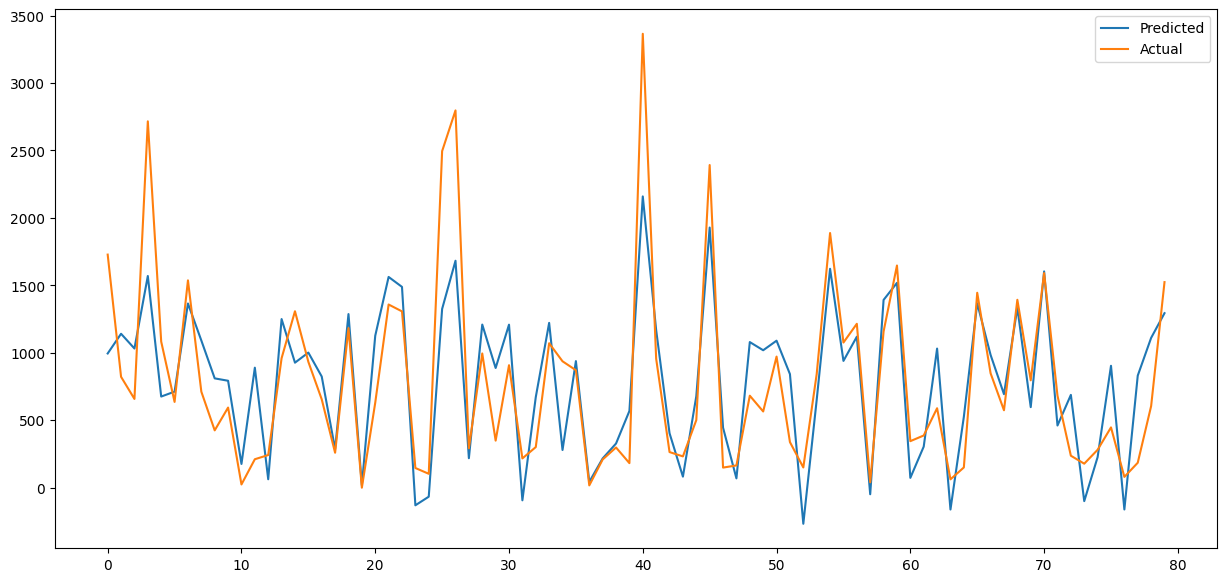

In [69]:
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)

### **Ridge with hyperparameter tuning**

Training score  = 0.6670661523264825
The best parameters found out to be :{'alpha': 1.9} 
where model best score is:  0.6638928726350958 

MAE : 288.27211846659986
MSE : 140323.262466113
RMSE : 374.5974672446585
R2 : 0.6570798501731858
Adjusted R2 :  0.6526366460106912 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


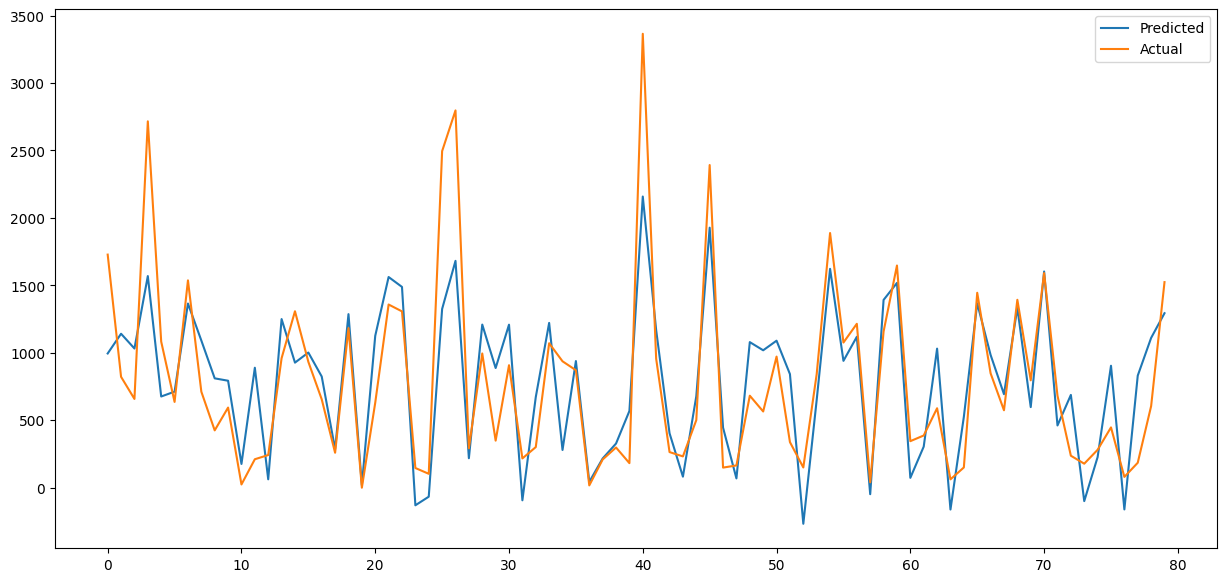

In [70]:
L2 = Ridge() #creating variable
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=5) #using gridsearchcv and cross validate the model
score_metrix(L2_cv,x_train,x_test,y_train,y_test) # fit and evaluate model with score_matrix function

### **Polynomial**

In [71]:
#creating variable with degree 2
poly = PolynomialFeatures(4)


poly_X_train = poly.fit_transform(x_train)
poly_X_test = poly.transform(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.191e+07, tolerance: 2.748e+05
  model = cd_fast.enet_coordinate_descent(


Training score  = 0.9062071129662955
MAE : 159.5075171164112
MSE : 56999.833984043136
RMSE : 238.74638004385142
R2 : 0.8607045527135466
Adjusted R2 :  1.0090289814962556 

********************************************************************************
coefficient 
 [  0.           0.          -0.         ...   0.          -0.
 -15.20647928]


Intercept  =  1237.253953399098


******************** ploting the graph of Actual and predicted only with 80 observation ********************


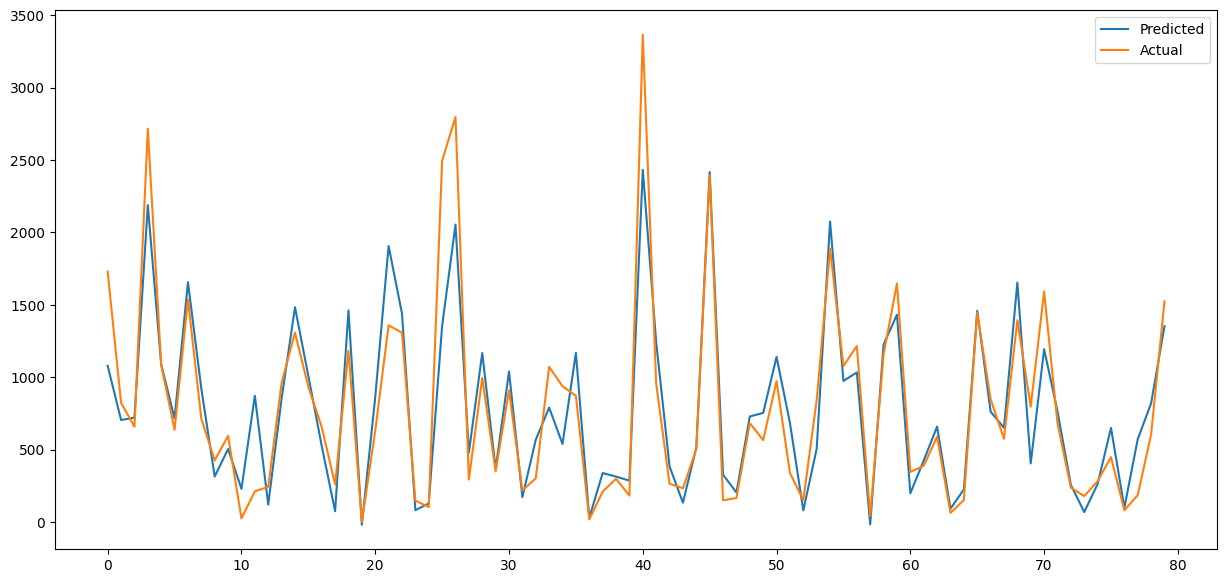

In [72]:
score_metrix(Lasso(),poly_X_train,poly_X_test,y_train,y_test)

### **Train Test split for Tree Base Models**
**because multicollinearty not effect tree base models**


In [73]:
len(df.columns)

29

In [74]:
new_x = df.drop(columns = ['Rented Bike Count'])
new_y = df['Rented Bike Count']

In [75]:
x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size = 0.25,random_state = 42)

In [76]:
scaler = PowerTransformer()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):


### **KNN Regressor**

Training score  = 0.8855712020177643
MAE : 184.3876712328767
MSE : 80338.75548858447
RMSE : 283.44092063176845
R2 : 0.8036692022058834
Adjusted R2 :  0.8011253510544557 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


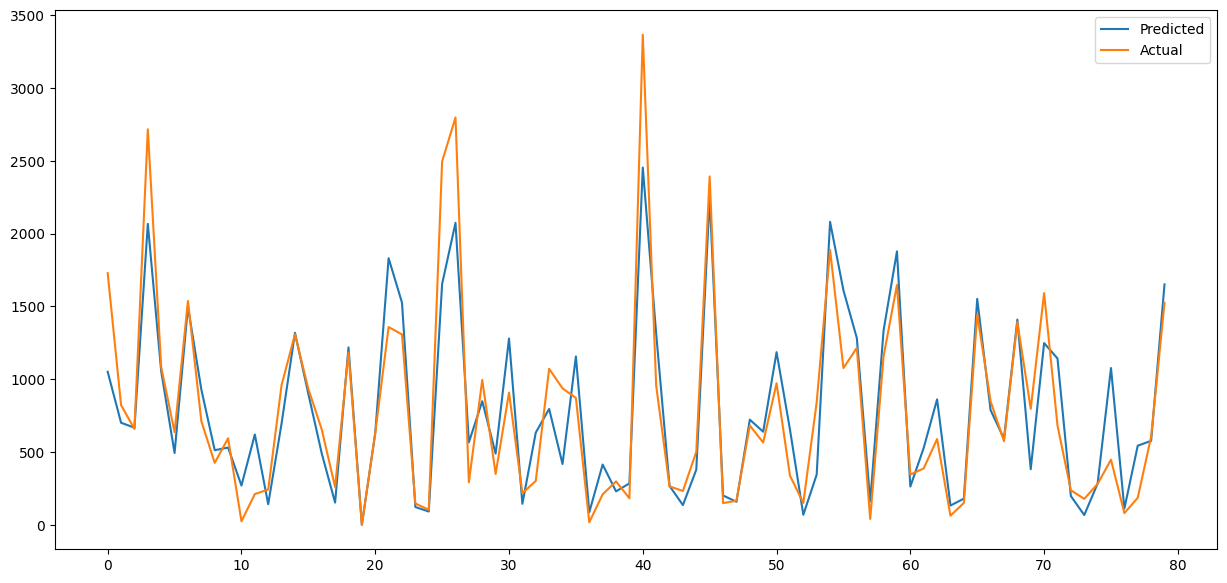

In [77]:
knn = KNeighborsRegressor()
score_metrix(knn,x_train,x_test,y_train,y_test)

### **Decision Tree Regressor**

Training score  = 1.0
MAE : 200.8283105022831
MSE : 107819.55433789955
RMSE : 328.3588804005452
R2 : 0.7365119861238855
Adjusted R2 :  0.7330979813166059 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


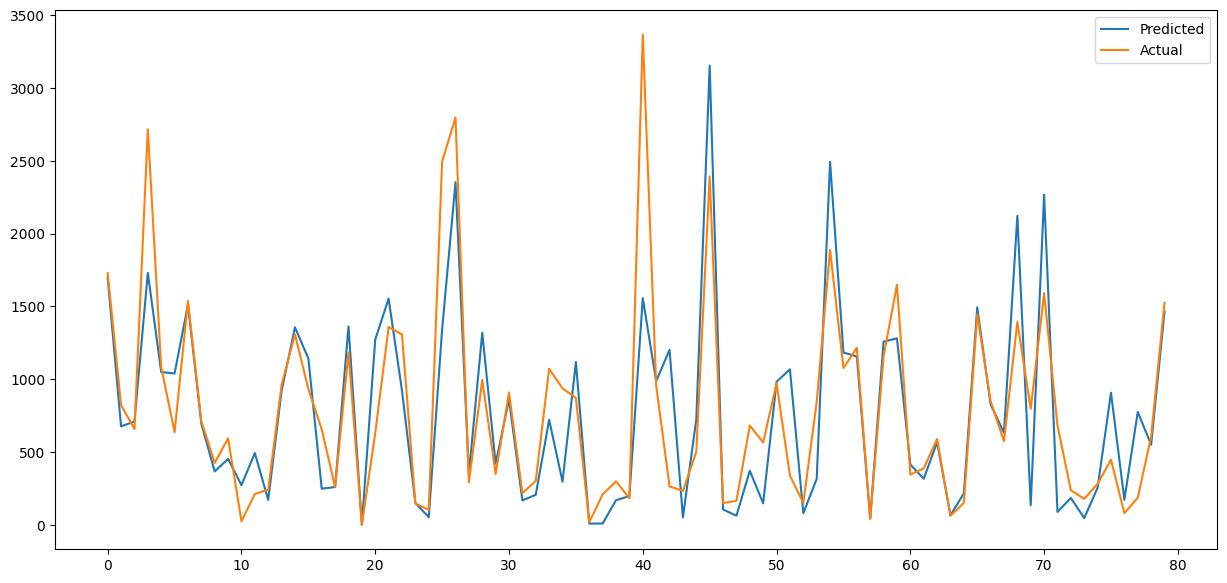

In [78]:
d_tree = DecisionTreeRegressor()
score_metrix(d_tree,x_train,x_test,y_train,y_test)

### **Random forest Regressor**

In [79]:
r_forest = RandomForestRegressor()

In [80]:
model = r_forest.fit(x_train,y_train)

Training score  = 0.9814914975527383
MAE : 151.10250228310503
MSE : 55091.59614894977
RMSE : 234.71599039892823
R2 : 0.8653678793267904
Adjusted R2 :  0.8636234557363924 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


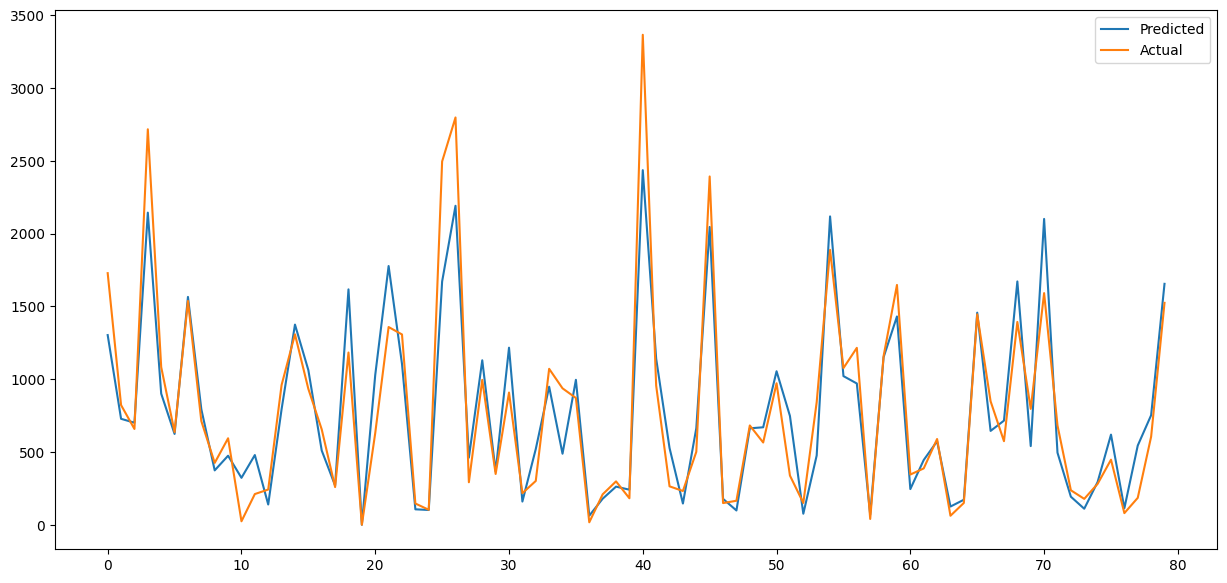

In [81]:
r_forest = RandomForestRegressor()
score_metrix(r_forest,x_train,x_test,y_train,y_test)

### **XGBoost Regression**

Training score  = 0.9602785110473633
MAE : 168.59371948242188
MSE : 65183.0078125
RMSE : 255.30963125683292
R2 : 0.8407065868377686
Adjusted R2 :  0.838642627759313 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


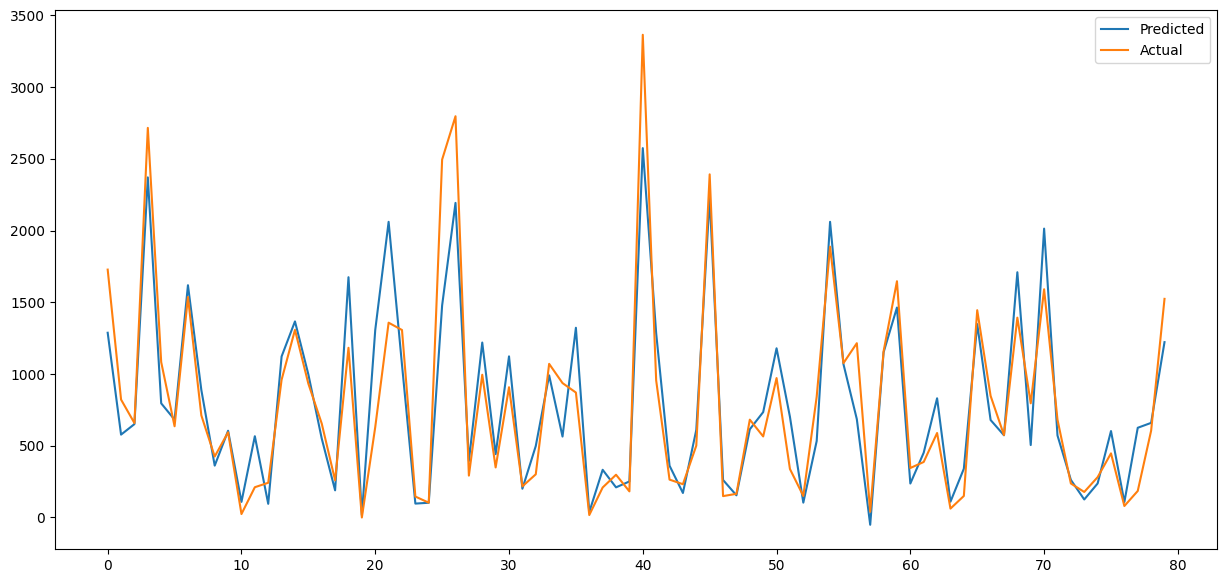

In [82]:
xg_boost = XGBRegressor()
score_metrix(xg_boost,x_train,x_test,y_train,y_test)

### **Adaboost Boost Regressor**

Training score  = 0.5668682793782365
MAE : 367.9083435105968
MSE : 187097.73291796053
RMSE : 432.5479544720568
R2 : 0.5427730122795689
Adjusted R2 :  0.5368487384914281 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


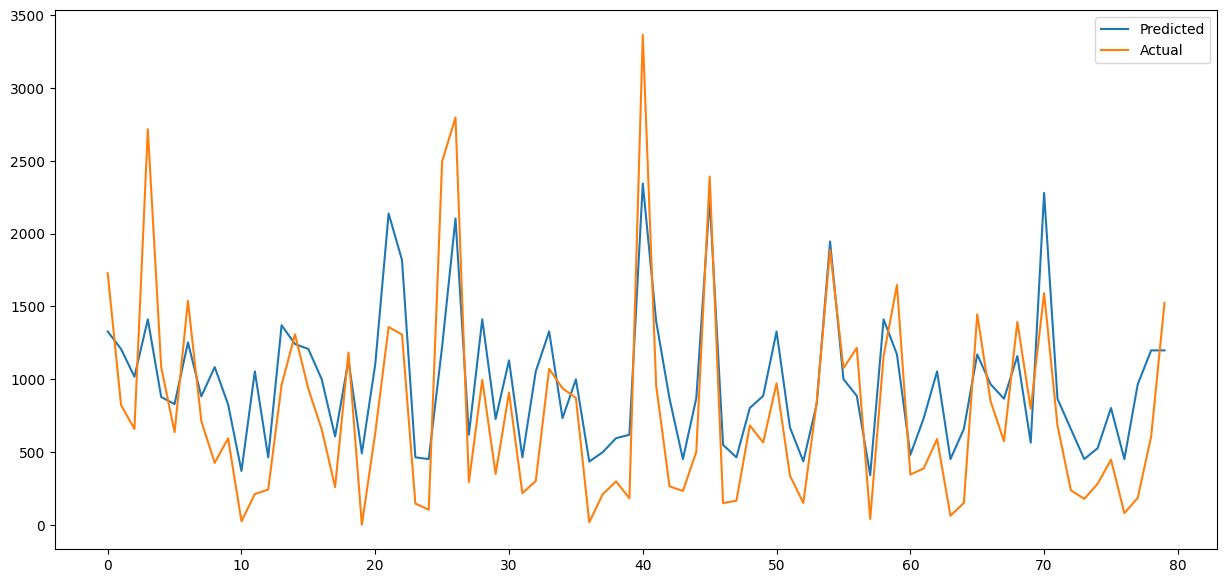

In [83]:
adda_boost = AdaBoostRegressor()
score_metrix(adda_boost,x_train,x_test,y_train,y_test)

### **support vector machine Regressor**

In [84]:
from sklearn.svm import SVR

Training score  = 0.23162037800628932
MAE : 379.2465948343619
MSE : 313927.97332612704
RMSE : 560.2927568031976
R2 : 0.23282693292695633
Adjusted R2 :  0.22288669883253465 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


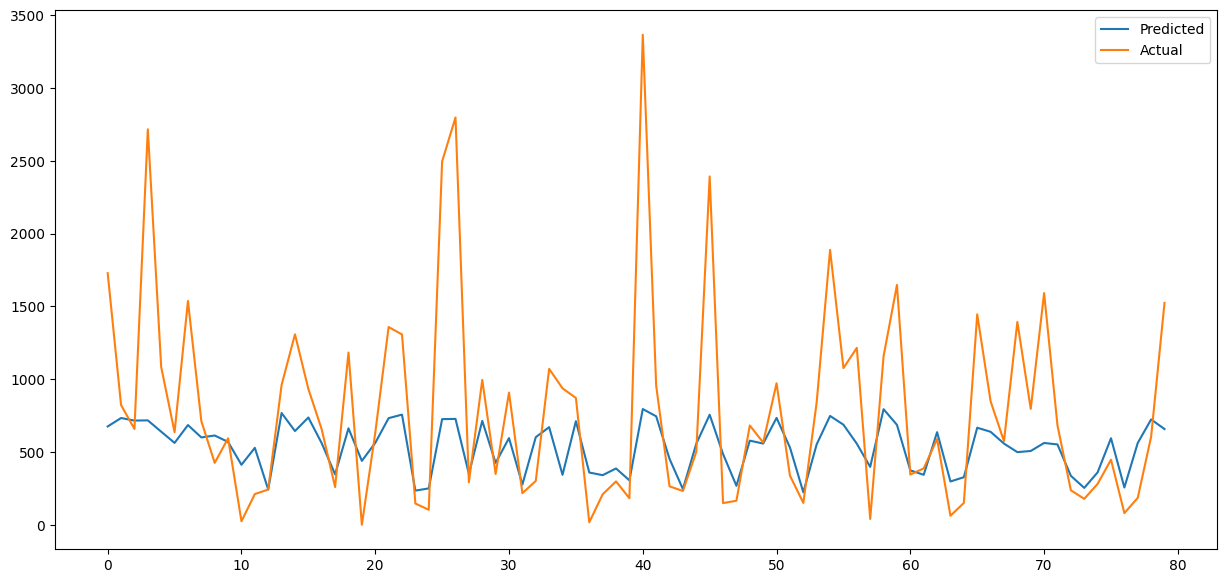

In [85]:
svm = SVR()
score_metrix(svm,x_train,x_test,y_train,y_test)

In [86]:
import pickle

In [87]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)